In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

import gensim 
from sklearn.ensemble import RandomForestClassifier


from wordcloud import WordCloud

In [4]:
data = pd.read_csv("Data/spam_ham_dataset.csv")

# Email Spam Filter Classifier 

The goal of this project is to create a classifier that will accurately classify whether or not an email is spam or ham based on the subject line and body of the email

## The Data

The dataset can be found on Kaggle at https://www.kaggle.com/datasets/venky73/spam-mails-dataset. It contains 2 useful columns, the label (ham or spam) and the text of the email.

In [5]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


### Quick Investigations of the Data

In [6]:
data['label'].value_counts()/len(data['label'])

label
ham     0.710114
spam    0.289886
Name: count, dtype: float64

In [7]:
(data.isna().sum())

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [8]:
data = data.drop('Unnamed: 0', axis=1)

### Data Visualization

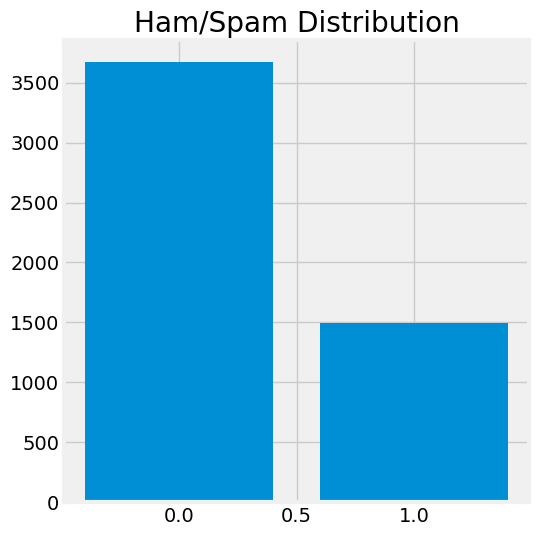

In [9]:
counts = data['label_num'].value_counts()

plt.figure(figsize=(6,6))
plt.style.use("fivethirtyeight")
plt.bar(counts.index, counts.values)
plt.title("Ham/Spam Distribution")
plt.show()

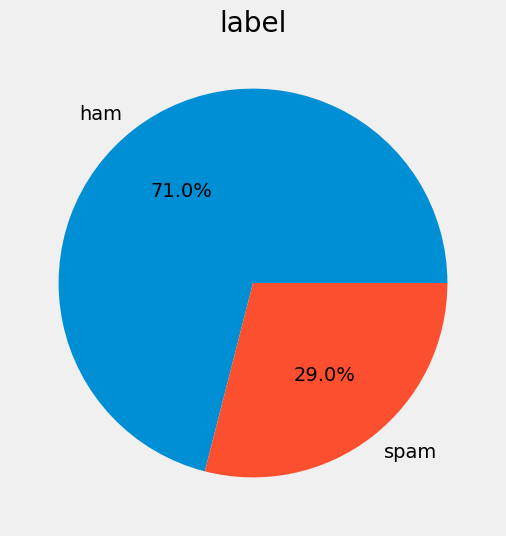

In [10]:
    temp=data["label"].value_counts()
    plt.figure(figsize=(6,6))
    plt.style.use("fivethirtyeight")
    plt.pie(temp.values,labels=temp.index,autopct="%1.1f%%")
    plt.title("label")
    plt.show()

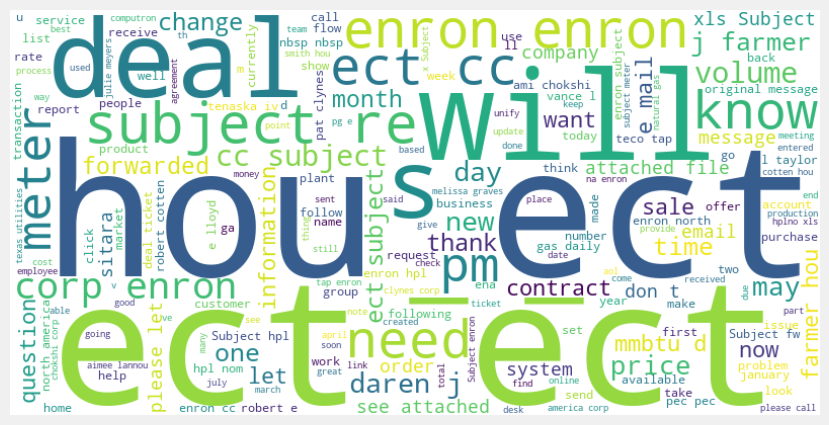

In [62]:
text_corpus = " ".join(data['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

## Naive-Bayes Classifier

In [11]:
X = data['text']
y = data['label_num']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
vectorizer = CountVectorizer()

X_tr_vec = vectorizer.fit_transform(X_train)
X_ts_vec = vectorizer.transform(X_test)

In [14]:
NBmod = MultinomialNB()

NBmod.fit(X_tr_vec, y_train)

MultinomialNB()

In [15]:
y_pred = NBmod.predict(X_ts_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9719806763285024
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



Text(21.78333333333333, 0.5, 'Actual')

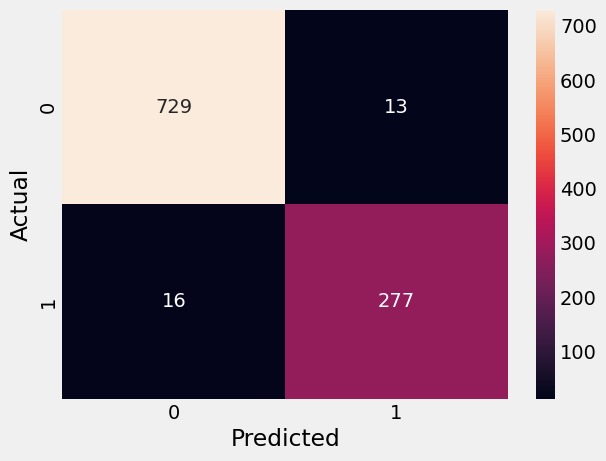

In [59]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Neural Networks

In [81]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=max_seq_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    patience=3
)

model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=100, 
          batch_size=16, callbacks=[callback], verbose=0)

In [79]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Perte du modèle : {loss}")
print(f"Précision du modèle : {accuracy}")

33/33 [==============================] - 0s 5ms/step - loss: 0.0601 - accuracy: 0.9816
Perte du modèle : 0.060121793299913406
Précision du modèle : 0.981642484664917


In [80]:
y_pred_prob = model.predict(X_test_pad)
y_pred = np.round(y_pred_prob).astype(int)

33/33 [==============================] - 0s 5ms/step


In [83]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9816425120772947
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       742
           1       0.96      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



Text(21.78333333333333, 0.5, 'Actual')

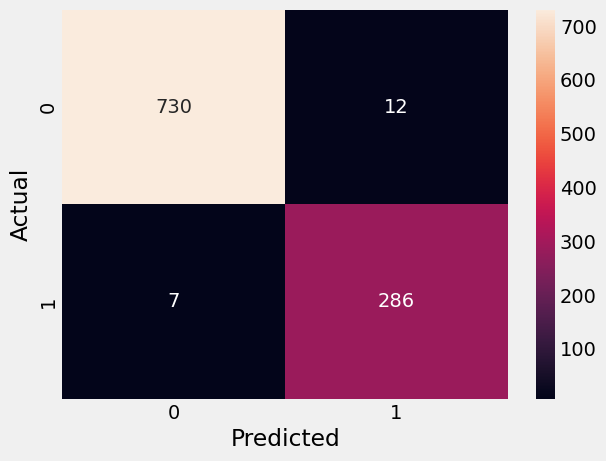

In [82]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')